# Credit Risk Resampling Techniques

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced

# Read the CSV into DataFrame

In [ ]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

# Split the Data into Training and Testing

In [ ]:
# Create our features
X = df.drop(columns='loan_status')
X = pd.get_dummies(X)
X.head()


In [ ]:
X.shape

In [ ]:
X.describe()

In [ ]:
# Create our target
y = df['loan_status']
y = y.to_frame()
y.head()

In [ ]:
y.shape

In [ ]:
# Check the balance of our target values
y['loan_status'].value_counts()

In [ ]:
# Create X_train, X_test, y_train, y_test
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()


In [ ]:
X_test.head()


In [ ]:
y_train.head()


In [ ]:
y_test.head()

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [ ]:
# Create the StandardScaler instance

# YOUR CODE HERE
scaler = StandardScaler()
scaler

In [ ]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# YOUR CODE HERE
X_scaler = scaler.fit(X_train)
X_scaler

In [ ]:
# Scale the training and testing data
# YOUR CODE HERE
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
training_rows = len(X_train_scaled)
training_rows

In [ ]:
testing_rows = len(X_test_scaled)
testing_rows

In [ ]:
print (f"The proportion of test data to total data is: {testing_rows / (testing_rows + training_rows)}%")

# Simple Logistic Regression

In [ ]:
slr_model = LogisticRegression(solver='lbfgs', random_state=1)
slr_model.fit(X_train_scaled, y_train)

In [ ]:
# Calculated the balanced accuracy score

y_slr_pred = slr_model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_slr_pred)


In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_slr_pred)

In [ ]:
# Display the confusion matrix

# confusion_matrix(y_test, y_pred)
slr_cmx = confusion_matrix(y_test, y_slr_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=slr_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

High Risk Recall: (563) / ( 563 + 56) = 0.909 <br>
Low Risk Recall: (18663) / (18663 + 102) = .99 <br>
High Risk Precision: (563) / (563 + 102) = 0.8466 <br>
Low Risk Precision: (14958) / (14958 + 56) = ..999 <br>

In [ ]:
slr_classReport = classification_report_imbalanced(y_test, y_slr_pred)
print(slr_classReport)

In [ ]:
# Print the imbalanced classification report

slr_classReport = classification_report_imbalanced(y_test, y_pred)
print (slr_classReport)

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [ ]:
# Resample the training data with the RandomOversampler
# YOUR CODE HERE

random_os = RandomOverSampler(random_state=1)
X_resample, y_resample = random_os.fit_resample(X_train_scaled, y_train)


In [ ]:
len(X_resample)

In [ ]:
len (y_resample) 

In [ ]:
y_resample

In [ ]:
# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_resample)

In [ ]:
y_resample['loan_status'].nunique()

In [ ]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
nro_model = LogisticRegression(solver='lbfgs', random_state=1)
nro_model.fit(X_resample, y_resample)
nro_model

In [ ]:
# Calculated the balanced accuracy score
# YOUR CODE HERE

nro_y_pred = nro_model.predict(X_test_scaled)
nro_BAC = round(balanced_accuracy_score(y_test, nro_y_pred), 5)
print(f"the Naive Random Oversampling balanced accuracy score is: {nro_BAC}")

In [ ]:
# Display the confusion matrix
# YOUR CODE HERE
nro_cmx = confusion_matrix(y_test, nro_y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=nro_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

High Risk Recall: (615) / ( 615 + 4) = 0.99  <br>
Low Risk Recall: (18641) / (18641 + 124) = .99 <br>
High Risk Precision: (615) / (615 + 124) = 0.832 <br>
Low Risk Precision: (18641) / (18641 + 4) = .99

In [ ]:
# Print the imbalanced classification report
# YOUR CODE HERE
nro_classReport = classification_report_imbalanced(y_test, nro_y_pred)
print(nro_classReport)

### SMOTE Oversampling

In [ ]:
# Resample the training data with SMOTE
# YOUR CODE HERE
X_smote_resampled, y_smote_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_scaled, y_train)
len(X_smote_resampled)

In [ ]:
len(y_smote_resampled)

In [ ]:
# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_smote_resampled)

In [ ]:
y_smote_resampled['loan_status'].nunique()

In [ ]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE

In [ ]:
smote_model = LogisticRegression(solver='lbfgs', random_state=1)
smote_model.fit(X_smote_resampled, y_smote_resampled)
smote_model

In [ ]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
y__smote_predicted = smote_model.predict(X_test_scaled)
smote_bac = round(balanced_accuracy_score(y_test, y__smote_predicted),5)
print(f"the SMOTE balanced accuracy score is: {smote_bac}")

In [ ]:
# Display the confusion matrix
# YOUR CODE HERE
smote_cmx = confusion_matrix(y_test, y__smote_predicted)
disp= ConfusionMatrixDisplay(confusion_matrix=smote_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

In [ ]:
# Print the imbalanced classification report
# YOUR CODE HERE
smote_classReport = classification_report_imbalanced(y_test, y_pred)
print(smote_classReport)

# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [79]:
# Resample the data using the ClusterCentroids resampler
# YOUR CODE HERE

cluster_c = ClusterCentroids(random_state=1)
X_cluster_resampled, y_cluster_resampled = cluster_c.fit_resample(X_train_scaled, y_train)
X_cluster_resampled

array([[ 4.48684872,  4.50223706,  4.49965919, ...,  1.00296215,
        -0.8133469 , -0.33947132],
       [ 4.53462173,  4.523598  ,  4.52355018, ...,  1.00296215,
        -0.8133469 , -0.33947132],
       [ 4.10466471,  4.12223732,  4.11740329, ...,  1.00296215,
        -0.8133469 , -0.33947132],
       ...,
       [ 0.33059752,  0.3296027 ,  0.33068085, ..., -0.9970466 ,
         1.22948768, -0.33947132],
       [-0.52931652, -0.55115649, -0.5532859 , ...,  1.00296215,
        -0.8133469 , -0.33947132],
       [ 0.95164655,  0.95476564,  0.95184668, ..., -0.9970466 ,
         1.22948768, -0.33947132]])

In [80]:
len(y_cluster_resampled)

3762

In [81]:
# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_cluster_resampled)

Counter({'loan_status': 1})

In [82]:
y_cluster_resampled['loan_status'].nunique()

2

In [83]:
# Train the Logistic Regression model using the resampled data
# YOUR CODE HERE
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_cluster_resampled, y_cluster_resampled)

LogisticRegression(random_state=1)

In [84]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
y_cluster_pred = model.predict(X_test_scaled)
cluster_bac = round(balanced_accuracy_score(y_test, y_cluster_pred),5)
print (f" the cluster balanced accuracy score is {cluster_bac}")

 the cluster balanced accuracy score is 0.99295


In [85]:
confusion_matrix(y_test, y_cluster_pred)

array([[  614,     5],
       [  113, 18652]])

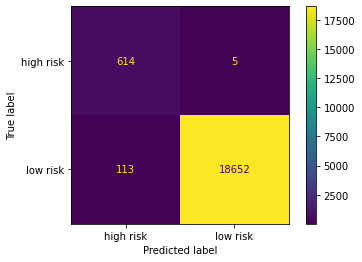

In [86]:
# Display the confusion matrix
# YOUR CODE HERE
cluster_cmx = confusion_matrix(y_test, y_cluster_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cluster_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

High Risk Recall: (614) / ( 614 + 5) = 0.99  <br>
Low Risk Recall: (18652) / (18652 + 113) = .99 <br>
High Risk Precision: (614) / (614 + 113) = 0.845 <br>
Low Risk Precision: (18652) / (18652 + 5) = .999

In [87]:
# Print the imbalanced classification report
# YOUR CODE HERE
cluster_classReport = classification_report_imbalanced(y_test, y_pred)
print(cluster_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.98       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [88]:
# Resample the training data with SMOTEENN
# YOUR CODE HERE
smoteeen = SMOTEENN(random_state=1)
X_smoteeen_resampled, y_smoteeen_resampled = smoteeen.fit_resample(X_train_scaled, y_train)

len(X_smoteeen_resampled)

111587

In [89]:
len(y_smoteeen_resampled)

111587

In [90]:
# View the count of target classes with Counter
# YOUR CODE HERE
Counter(y_smoteeen_resampled)

Counter({'loan_status': 1})

In [91]:
# Train the Logistic Regression smoteen_model using the resampled data
# YOUR CODE HERE
smoteen_model = LogisticRegression(solver='lbfgs', random_state=1)
smoteen_model.fit(X_smoteeen_resampled, y_smoteeen_resampled)

LogisticRegression(random_state=1)

In [92]:
# Calculate the balanced accuracy score
# YOUR CODE HERE
y_smoteeen_pred = smoteen_model.predict(X_test_scaled)
smoteeen_bac = round(balanced_accuracy_score(y_test, y_smoteeen_pred),5)
print(f"the smoteeen bac is {smoteeen_bac}")

the smoteeen bac is 0.99346


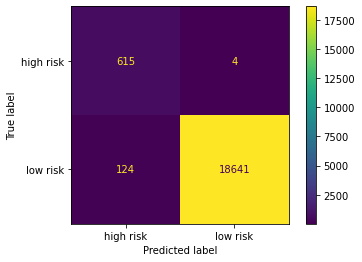

In [93]:
smoteeen_cmx = confusion_matrix(y_test, y_smoteeen_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=smoteeen_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

High Risk Recall: (615) / ( 615 + 4) = .99  <br>
Low Risk Recall: (18641) / (18641 + 124) = .99 <br>
High Risk Precision: (615) / (615 + 124) = 0.99 <br>
Low Risk Precision: (18641) / (18641 + 4) = .99

In [94]:
# Print the imbalanced classification report
# YOUR CODE HERE
smoteen_classReport = classification_report_imbalanced(y_test, y_smoteeen_pred)
print(smoteen_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.83      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



# --------------------------------------------------

# Final Questions

1. ## Which model had the best balanced accuracy score?

   It was essentially a three way tie between the nativeNative Random Oversampling method, the SMOTE method and the SMOTEEN method.

2. ## Which model had the best recall score?

    All achieved a total/mean recall of .99. <br>
    However, both the NRO and the SMOTEEN methods returned recalls of .99 for the 'high risk' customers, whereas the others scored .98. THerefore, these would be preferred.

3. ## Which model had the best geometric mean score?

    Across the board, all models scored geometric means of .99 for the high risk and low risk classifications, as well as for the average / total


# Balanced Accuracy Scores:

In [110]:
#Simple Linear Regression
print (f"The simple linear regression Balanced accuracy score is: {slr_bac}")

The simple linear regression Balanced accuracy score is: 0.95205


In [111]:
### Oversampling: Naive Random Oversampling
print(f"the Naive Random Oversampling balanced accuracy score is: {nro_BAC}")

the Naive Random Oversampling balanced accuracy score is: 0.99346


In [112]:
### Oversampling: SMOTE
print(f"the SMOTE balanced accuracy score is: {smote_bac}")

the SMOTE balanced accuracy score is: 0.99346


In [113]:
# Undersampling: Cluster Centroids
print (f" the cluster balanced accuracy score is {cluster_bac}")

 the cluster balanced accuracy score is 0.99295


In [114]:
# Combination: SMOTEEN
print(f"the smoteeen bac is {smoteeen_bac}")

the smoteeen bac is 0.99346


# Confusion Matrixes

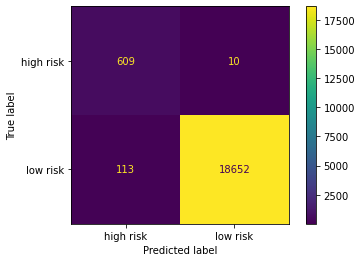

In [115]:
#Simple Linear Regression
disp= ConfusionMatrixDisplay(confusion_matrix=slr_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

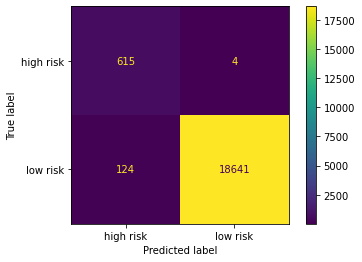

In [116]:
### Oversampling: Naive Random Oversampling
disp= ConfusionMatrixDisplay(confusion_matrix=nro_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

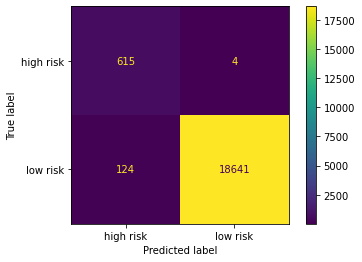

In [117]:
### Oversampling: SMOTE
disp= ConfusionMatrixDisplay(confusion_matrix=smote_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

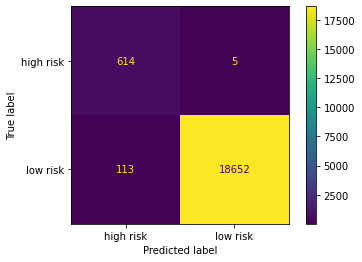

In [118]:
# Undersampling: Cluster Centroids
disp= ConfusionMatrixDisplay(confusion_matrix=cluster_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

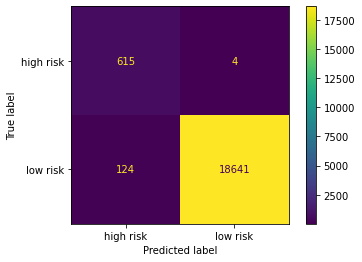

In [119]:
# Combination: SMOTEEN
disp= ConfusionMatrixDisplay(confusion_matrix=smoteeen_cmx, display_labels=['high risk', 'low risk'])
disp.plot();

# Classification Reports

In [120]:
#Simple Linear Regression
print (slr_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.98       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



In [121]:
### Oversampling: Naive Random Oversampling
print(nro_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.83      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



In [122]:
### Oversampling: SMOTE
print(smote_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.98       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



In [123]:
# Undersampling: Cluster Centroids
print(cluster_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      0.98      0.99      0.91      0.99      0.98       619
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18765

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



In [124]:
# Combination: SMOTEEN
print(smoteen_classReport)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.83      0.99      0.99      0.91      0.99      0.99       619
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18765

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384

